Goals:
1) Scrape basketball reference data with scraper
2) Visualize per game information by year DONE
3) Visualize team totals breakdown
4) Create a scraper class/method instead of having each func scrape


In [4]:
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import os, ssl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.error import HTTPError

# Verify html request
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

# seaborn preset
sns.set()


In [5]:
def stat_leaders_barchart(stat, num_of_players, year, per):
    """Returns a bar graph containing the stat leaders for a year and per measurment type
    
        stat is the statistic that will be measured
        num_of_players is how many players you want to be shown (over 30 gets slow and hard to read)
        year is the season year, 2020 is 2019-20
        per is how the statistic will be measured per game,  36 minute, or 100 possesions (game, minute, poss)"""
    
    
    
  
    try:
        # Setting year and per type to analyze and open html
        url = "https://www.basketball-reference.com/leagues/NBA_{}_per_{}.html".format(year, per)
        html = urllib.request.urlopen(url)
        
        # Creating soup object
        soup = BeautifulSoup(html)
    except HTTPError as err:
        if err.code == 404:
            print("Something went wrong! Ensure that the information entered is valid!")
            return
        else:
            print("Whoops! something went really wrong! Its not a 404, website may be down or maybe you broke the code?")
            return
    
    # Getting column headers with findAll
    soup.findAll('tr', limit=2)
    headers = [th.getText() for th in soup.findAll('tr', limit=2) [0].findAll('th')]
    headers = headers[1:]

    # Getting row data
    rows = soup.findAll('tr')[1:]
    player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

    # Create df
    stats = pd.DataFrame(player_stats, columns = headers)

    # Sort by name and drop duplicates
    stats = stats.sort_values(by = ['Player'], inplace = False)
    stats.drop_duplicates(subset = ['Player'], inplace = True, keep = 'first')

    # Convert stat columns to numeric
    #**Make this more efficient**
    if (per == "game"):
        stats[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', 
        '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']] = stats[['Age', 
        'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT','FTA', 'FT%', 'ORB','DRB', 
        'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].apply(pd.to_numeric)
    elif (per == "minute" or per == "poss"):
        stats[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', 
        '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']] = stats[['Age', 
        'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT','FTA', 'FT%', 'ORB','DRB', 
        'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].apply(pd.to_numeric)
        
    # Sorts df by stat and creates leaders df with num_of_players
    #** Ensure NBA minimums are met**
    sort_by_stat = stats.sort_values(by = [stat], ascending = False)
    leaders = sort_by_stat[0:num_of_players]
    
    # Creates barchart and formats it
    #**Format based on num_of_players?**
    chart = sns.barplot(data = leaders, x = 'Player', y = stat, color = 'cyan')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment = 'center',  fontweight='light',
    fontsize='medium')
    
    return chart

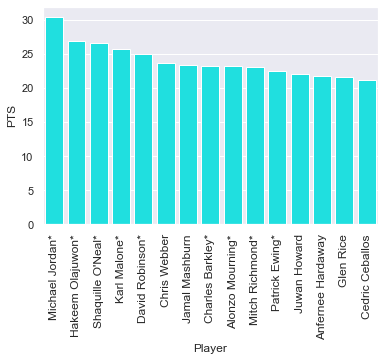

In [10]:
#Make sure stat is defined with correct 3 letter designation

stat_leaders_barchart("PTS", 15, 1996, "game")

In [280]:
#UNDER CONSTRUCTION (Not Functional... yet!)


def team_pts_piechart(year, team):
    """ Returns a pie chart of share of total points for a team in a given year.
    
        year is season year 2019-20 is 2020
        team is the 3 letter all caps designation for the team
        
        Will include functionality for other stats besides points."""
    
    
    try:
        # Setting team and year to analyze
        url = "https://www.basketball-reference.com/teams/{}/{}.html#all_roster".format(team, year)
        html = urllib.request.urlopen(url)

        # Creating soup object
        soup = BeautifulSoup(html, 'html.parser')

    except HTTPError as err:
        if err.code == 404:
            print("Something went wrong! Ensure that the information entered is valid!")
            #return



    tables = soup.findAll("tables")
    print(tables)

In [279]:
team_pts_piechart(2020, "HOU")

[]